# <center> Telco: Why are customers churning? 

In [1]:
from acquire import get_telco_data
from prepare import clean_data, train_validate_test_split

import pandas as pd
import numpy as np
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

# preparing

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Planning

## Goals

- Find Churn drivers.
- Acquire Telco data creeating a fuction that would access the SQL database.
- Use a a python funcion that will clean and tidy up the data. 
- Build 3 different models to predict churn using classification algorithms.
-
-
-
- Conclusion, takeaways, and next steps.

# Acquire Data

In [2]:
# Use the imported function from acquire.py to panda data frame
df = get_telco_data()
# View the first 5 recored of data frame a look at our dataframe
df.head(5).T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


# Prepare

In [3]:
df.shape

(7043, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


## Takeaways and actions

- `user_id` is not usefull --> delete
- Records with tenure equal to 0 are deleted --> 11 recoreds deleted
- Change object data types to proper string or numeric type
- Change `Yes` and `No` values to `0` and `1` when data type reprecents boolan values
- Create dummy values for the categorical data
- Create a column that holds value of 1 if customer has internet
- Dete all l


In [6]:
df = clean_data()

In [7]:
df.sample(10).T

,2258,2739,2462,2050,5203,2950,1560,4601,965,6956
payment_type_id,3,1,4,1,1,3,1,1,1,2
internet_service_type_id,1,2,2,1,2,2,1,2,1,3
contract_type_id,1,3,3,1,1,2,1,1,2,1
senior_citizen,0,0,0,0,0,0,0,0,0,0
partner,1,1,0,0,0,0,0,0,1,0
dependents,0,0,0,0,0,0,0,0,1,0
tenure,42,72,71,1,31,54,1,1,39,2
phone_service,0,1,1,1,1,1,0,1,1,1
multiple_lines,No phone service,Yes,Yes,Yes,Yes,Yes,No phone service,No,No,No
online_security,Yes,No,Yes,No,No,No,No,No,Yes,No internet service


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,is_female
0,2,1,3,0,1,1,65,1,1,90.45,5957.90,0,1
1,4,1,3,0,0,0,54,0,0,45.20,2460.55,0,0
2,3,1,3,0,0,0,56,0,0,45.05,2560.10,0,1
3,4,1,3,0,1,1,20,0,1,39.40,825.40,0,0
4,3,1,3,0,1,0,72,1,1,85.15,6316.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,0,1,1,1,1,0,20.05,20.05,0,1
7039,2,3,1,0,0,0,19,1,0,19.90,367.55,0,1
7040,4,3,1,0,0,0,6,1,0,19.70,129.55,0,1
7041,2,3,1,0,0,0,1,1,0,18.90,18.90,0,0


## <center>Split the data sets<center>

In [9]:
# Creates a fucntion that train_validate_test_split the data before using it
# in the exploratory phase
def train_validate_test_split(x):
    """
    This function returns three datasets labeld as train, validate, test
    Data is divided as follows:
    - train    = 50%
    - validate = 30%
    - test     = 20%
    """
    train_validate, test = train_test_split(x, test_size=.2, 
                                            random_state=123, 
                                            stratify=x.churn)
    
    # Split train_validate into train and validate datasets.
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)
    return train, validate, test

In [10]:
train, validate, test = train_validate_test_split(df)

In [11]:
print(train.shape, validate.shape, test.shape)

(3937, 38) (1688, 38) (1407, 38)


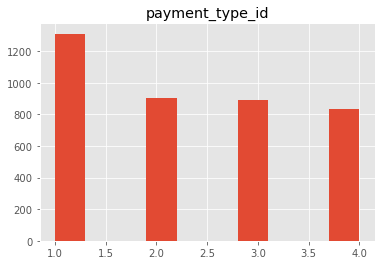

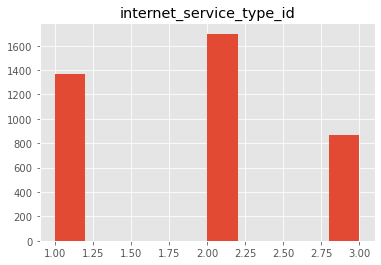

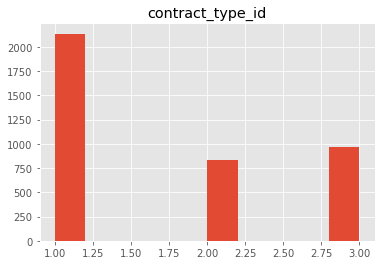

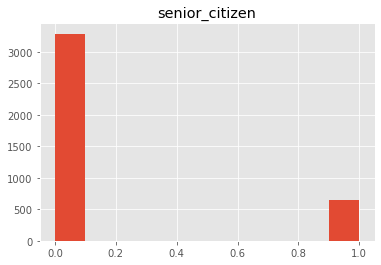

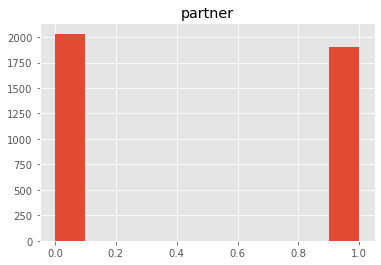

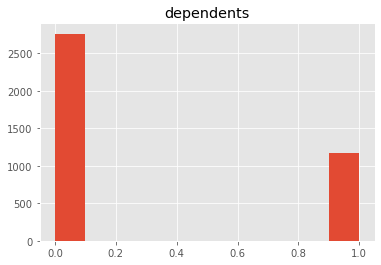

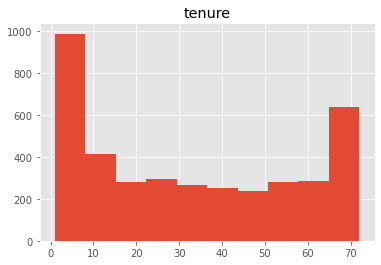

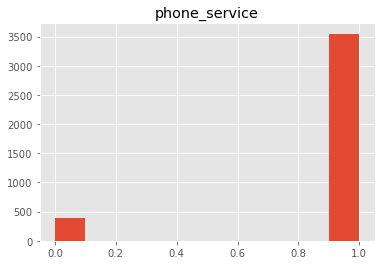

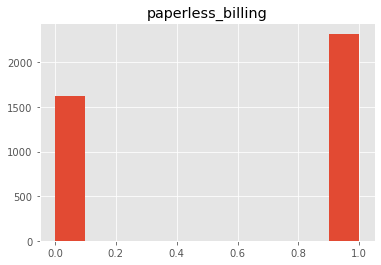

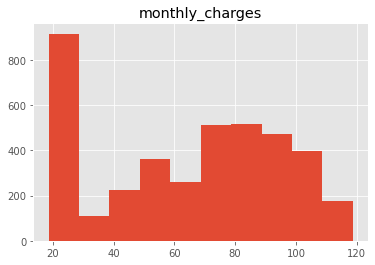

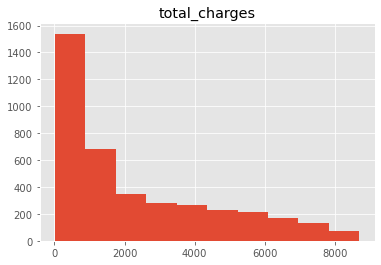

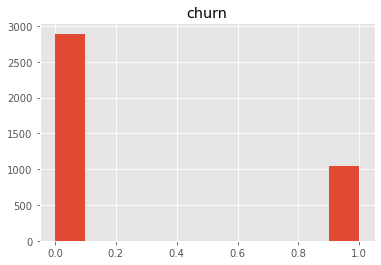

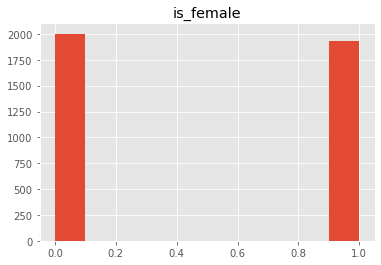

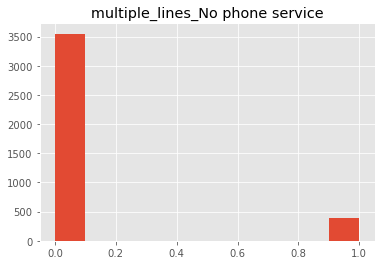

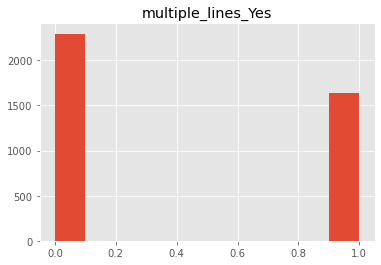

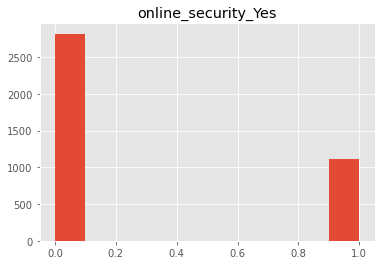

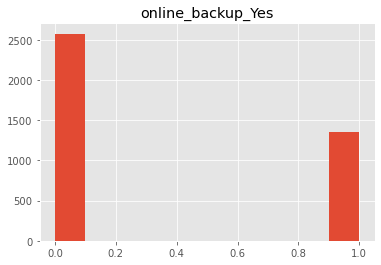

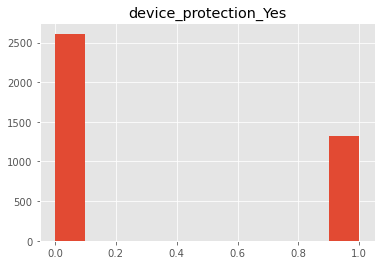

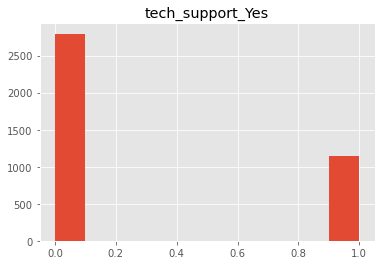

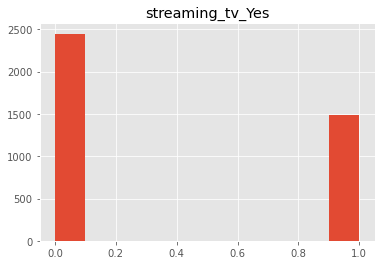

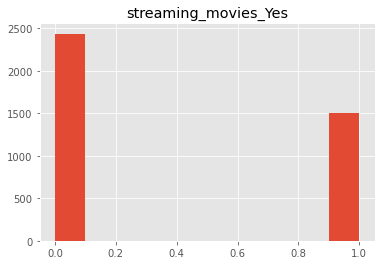

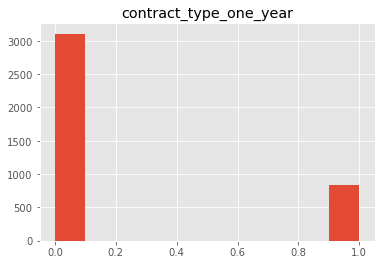

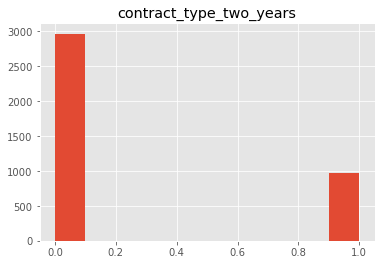

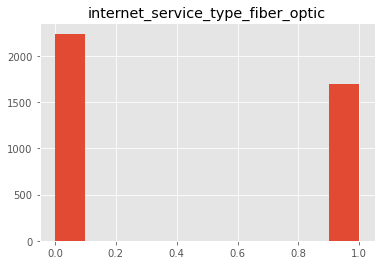

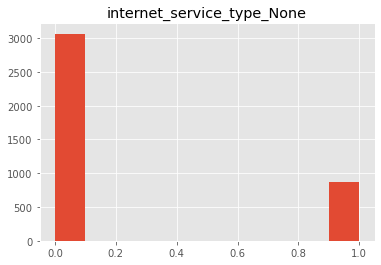

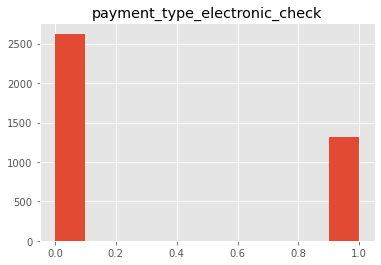

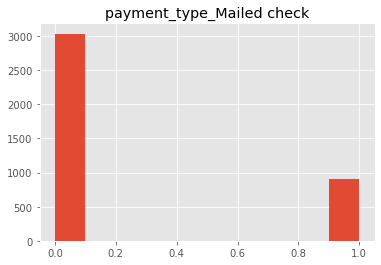

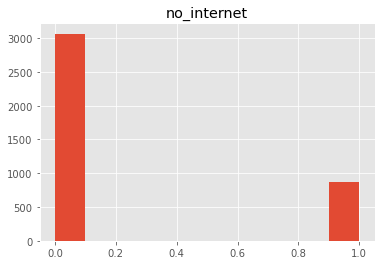

In [12]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    plt.style.use('ggplot')
    plt.hist(train[col])
    plt.title(col)
    plt.show()

## Exploration and Pre-processing

In [13]:
# Creates a list of the attributes of the for easy retrival 

colums = list(df.columns)

### Goal:
Compare churn with multiple fetures

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,3937.0,2.316485,1.142942,1.00,1.00,2.00,3.00,4.00
internet_service_type_id,3937.0,1.873762,0.743580,1.00,1.00,2.00,2.00,3.00
contract_type_id,3937.0,1.704597,0.837911,1.00,1.00,1.00,2.00,3.00
senior_citizen,3937.0,0.164338,0.370629,0.00,0.00,0.00,0.00,1.00
partner,3937.0,0.483617,0.499795,0.00,0.00,0.00,1.00,1.00
dependents,3937.0,0.297943,0.457412,0.00,0.00,0.00,1.00,1.00
tenure,3937.0,32.505715,24.773712,1.00,8.00,29.00,56.00,72.00
phone_service,3937.0,0.901194,0.298440,0.00,1.00,1.00,1.00,1.00
paperless_billing,3937.0,0.589027,0.492073,0.00,0.00,1.00,1.00,1.00
monthly_charges,3937.0,64.191046,30.129425,18.55,34.95,69.95,89.45,118.75


### There is a 26.6% churn rate 

In [15]:
# Overall churn rate
f'Percentage of custumers churning \
{train.churn.value_counts(normalize=True)[1].round(3) *100}%'


'Percentage of custumers churning 26.6%'

In [16]:
churn_rate = train.churn.value_counts(normalize=True)[1]
churn_rate

0.2656845313690627

In [17]:
# Percentage of customers with internet
f'Percentage of custumers that do NOT have internet %\
{train.no_internet.value_counts(normalize=True)[1].round(3) *100}'

'Percentage of custumers that do NOT have internet %22.1'

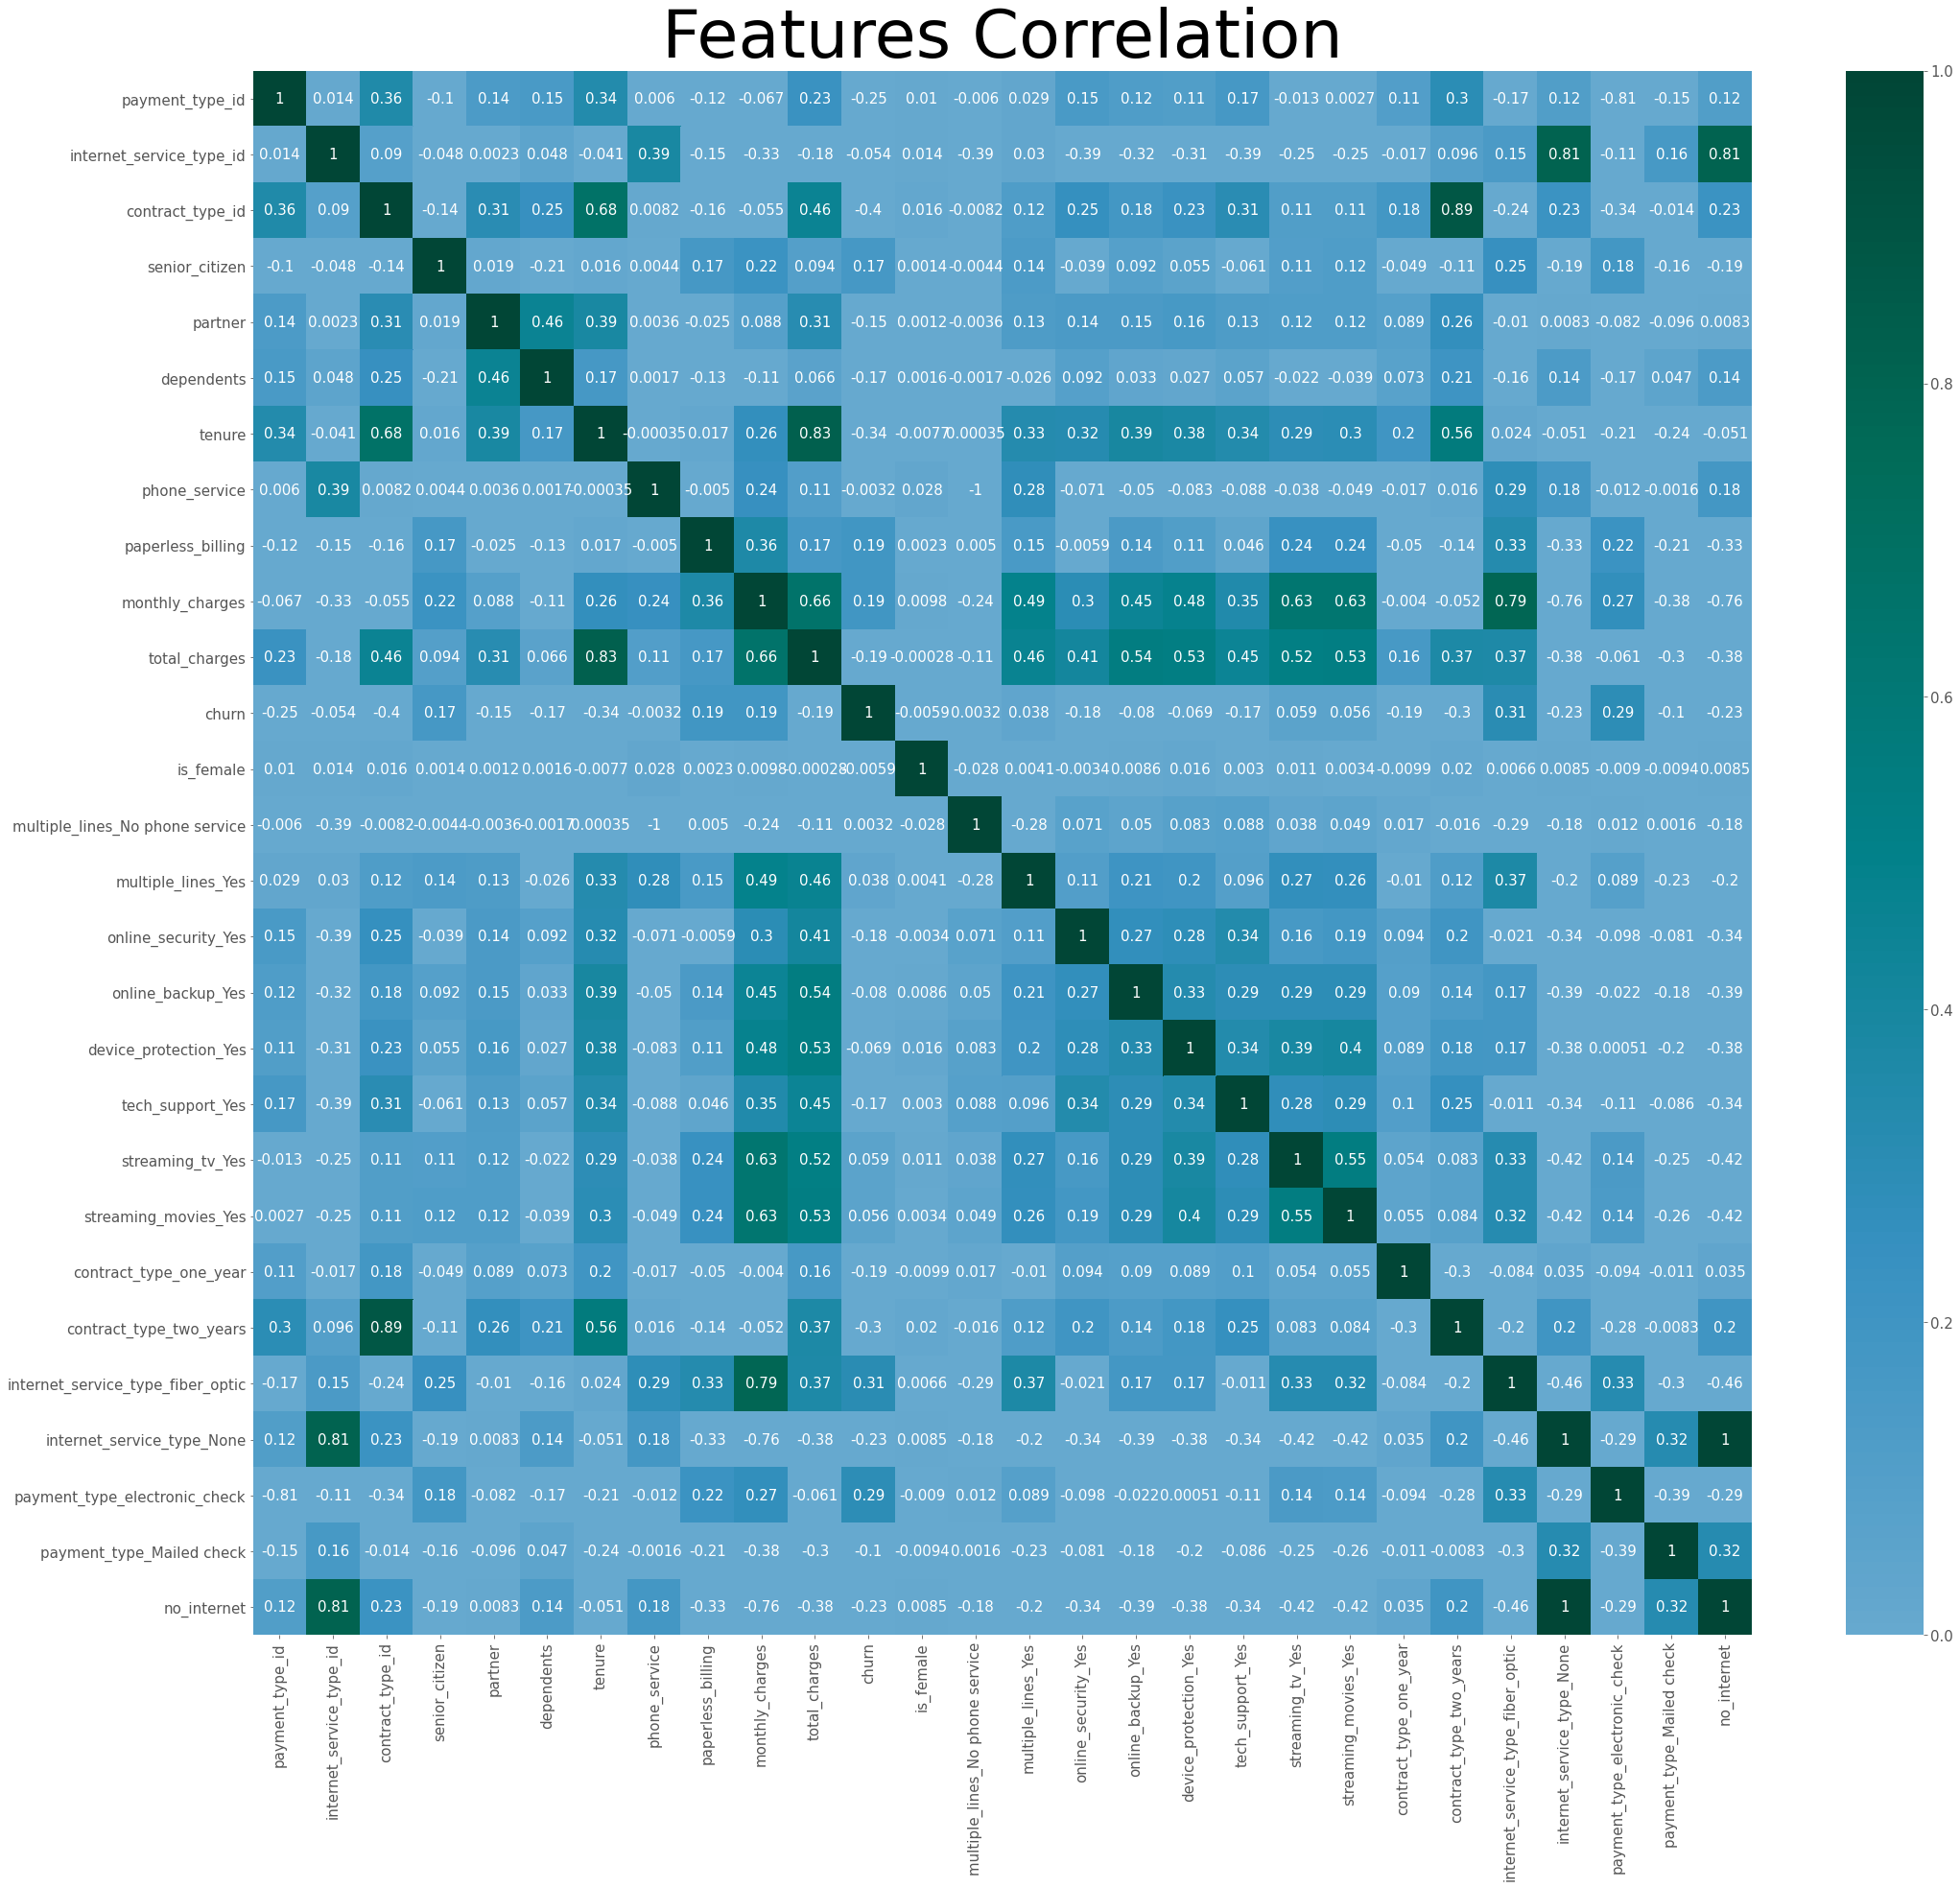

In [18]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(35, 30))
plt.rc('font', size=15)
sns.heatmap(train.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Features Correlation', size=70)
plt.show()

In [19]:

# create a data frame of columns that I will want to analyze deeper mainly containing different types of services

tenure_and_churn = train[['contract_type',\
                        'tenure',\
                        'churn',\
                        'internet_service_type',\
                        'online_backup_Yes',\
                        'device_protection_Yes',\
                        'online_security_Yes',\
                        'payment_type',\
                        'streaming_tv_Yes',\
                        'streaming_movies_Yes',\
                        ]]

tenure_and_churn.head(2)

,contract_type,tenure,churn,internet_service_type,online_backup_Yes,device_protection_Yes,online_security_Yes,payment_type,streaming_tv_Yes,streaming_movies_Yes
6096,Two year,70,0,None,0,0,0,Bank transfer (automatic),0,0
1603,Month-to-month,15,0,DSL,1,1,0,Mailed check,0,1


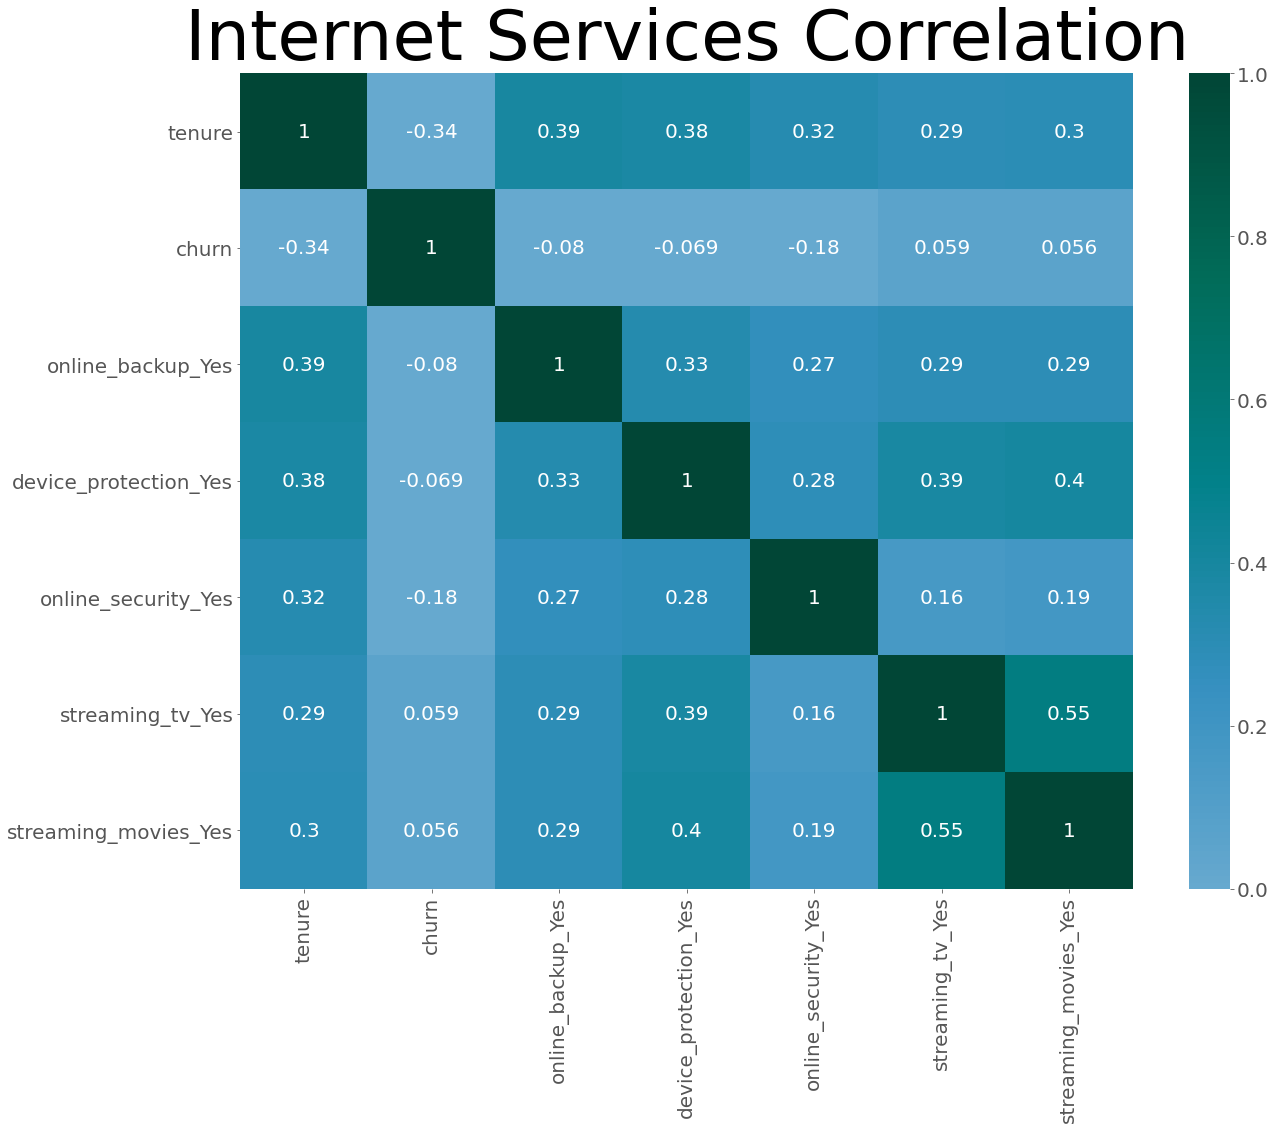

In [20]:
# chrats heat map  showing correlation 
plt.rc('figure', figsize=(20, 15))
plt.rc('font', size=20)
sns.heatmap(tenure_and_churn.corr(), cmap="PuBuGn",\
            annot=True,\
            center=0,
            vmin=0, vmax=1) # allows for better visual identification of correlation 

plt.title('Internet Services Correlation', size=70)
plt.show()

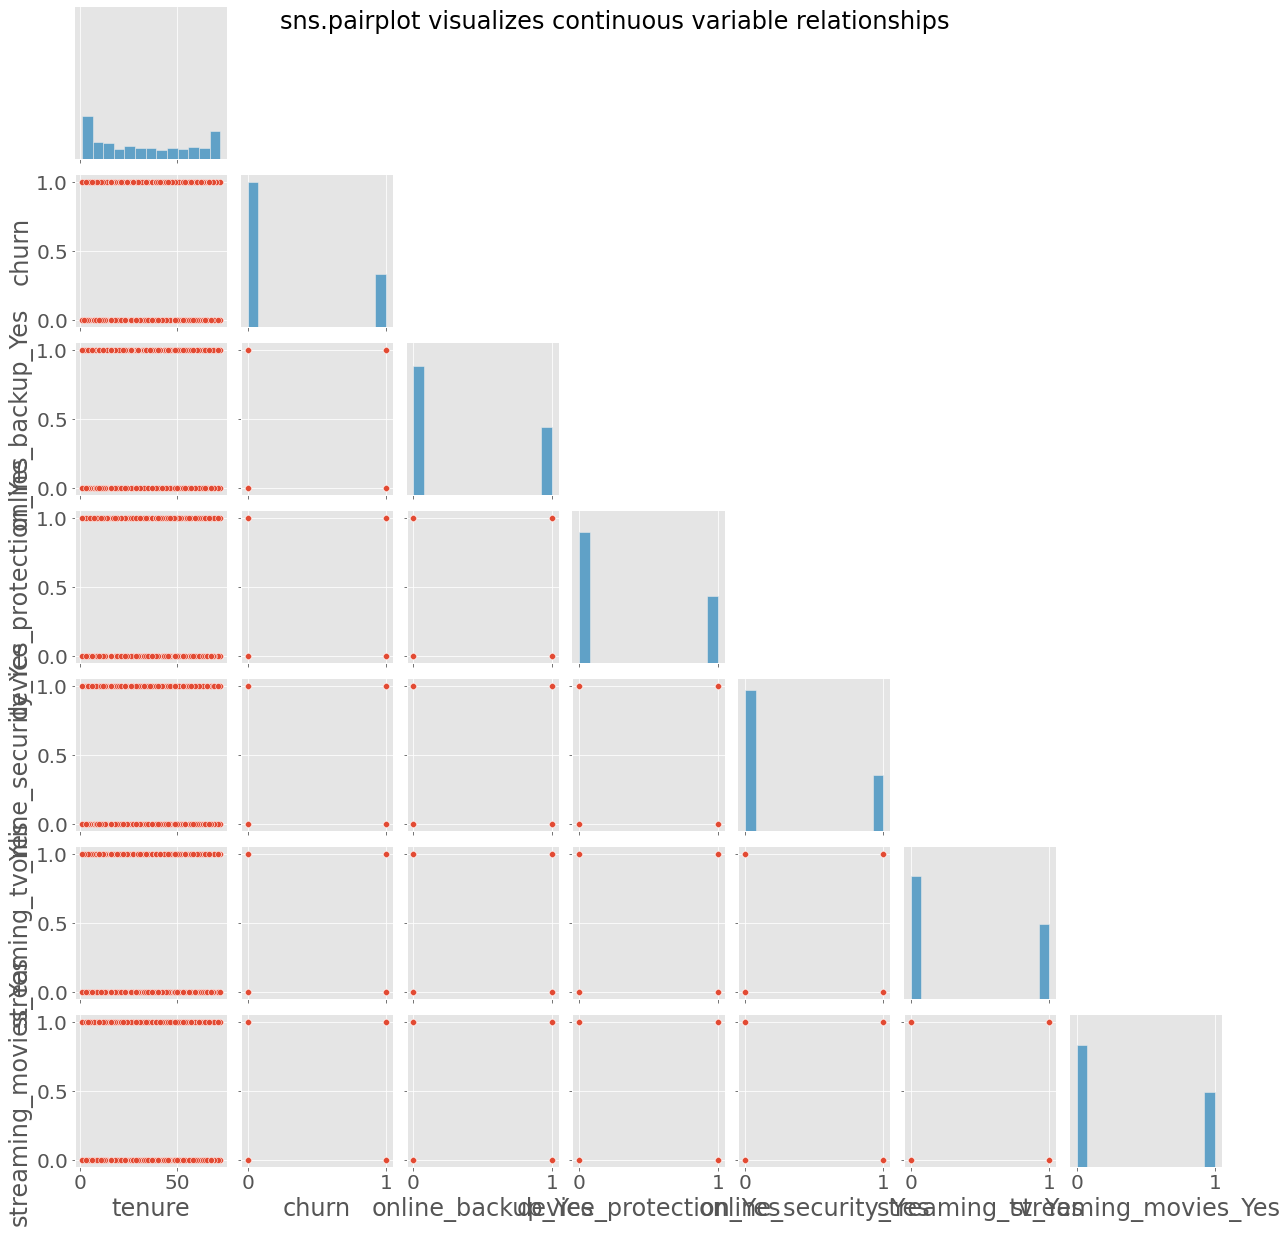

In [21]:
sns.pairplot(tenure_and_churn, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

###  Takeaways

- Fiver optics drive monthly charges up 
- seems that people that pay with electronic check tend to churn more than normal
- Senior citicents seem to have some relation with churn
- Tenure is strong with added security services `online_backup_Yes`, `online_security_Yes` and `online_backup_Yes`

### Questions to hypothesys

Added safety fitures such as `online_backup_yes` and `device_protection_yes` and `online_security_yes` deacrease churn.

- what is the probabiluty that given a customer is sold one this will stay longuer in the company



###  Statistical test set up

In [22]:
# define alpha
alpha = .05

## 1. Does the internet service affect churn?

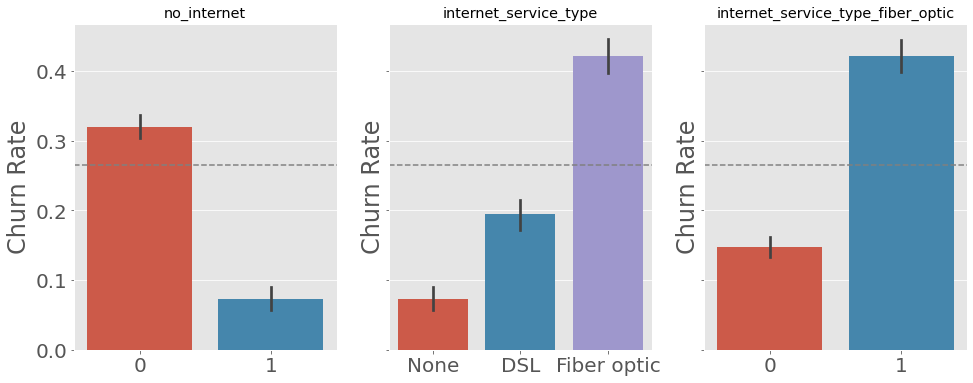

In [23]:
features = ['no_internet', 'internet_service_type', 'internet_service_type_fiber_optic']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

### Takeawy

- People who had Internet service churn at a rate of over three times the people who don't
- People who use fiber optic leave add a rate of two times of those use DSL.

## Hypothesis

$H_0$: Rate of churn is not dependent on customer Internet_service_type_fiber_optic.

$H_1$: Rate of churn is dependent customer Internet_service_type.


In [24]:
# Run a chi squared to compare proportions,
null_hypothesis = "Rate of churn is not dependent on customer internet_service_type_fiber_optic"
alternative_hypothesis = "Rate of churn is dependent customer internet_service_type_fiber_optic"

observed = pd.crosstab(train.churn, train.internet_service_type_fiber_optic)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis:", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis: Rate of churn is not dependent on customer internet_service_type_fiber_optic
Sufficient evidence to move forward understanding that Rate of churn is dependent customer internet_service_type_fiber_optic


In [25]:
chi2, p

(370.97219650069576, 1.1495226539962088e-82)

In [26]:
observed

internet_service_type_fiber_optic,0,1
churn,,
0,1909,982
1,330,716


------------

## 2. Do people that use streming services churn more?

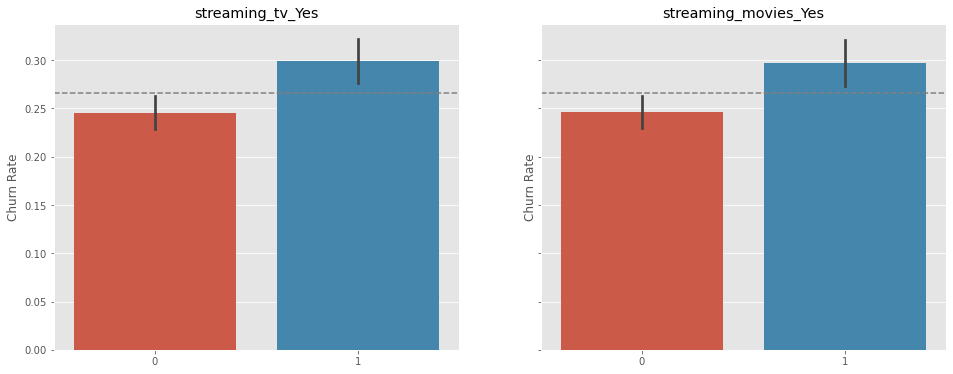

In [27]:
#streamers churn

features = ['streaming_tv_Yes', 'streaming_movies_Yes']
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeaway
- Streaming services seem to increase churn 


## Hypothesis

$H_0$: Rate of churn is not dependent on customer streaming movies.

$H_1$: Rate of churn is dependent customer streaming movies.

In [28]:
# Run a chi squared to compare proportions,
null_hypothesis = " Rate of churn is not dependent on customer streaming movies"
alternative_hypothesis = "Rate of churn is dependent customer streaming movies."

observed = pd.crosstab(train.churn, train.streaming_movies_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis:", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis:  Rate of churn is not dependent on customer streaming movies
Sufficient evidence to move forward understanding that Rate of churn is dependent customer streaming movies.


In [29]:
chi2, p

(12.040155040987663, 0.000520666407496413)

In [30]:
observed

streaming_movies_Yes,0,1
churn,,
0,1836,1055
1,600,446


-----------

## 3. Does having online secqurity fetures decrease churn?  

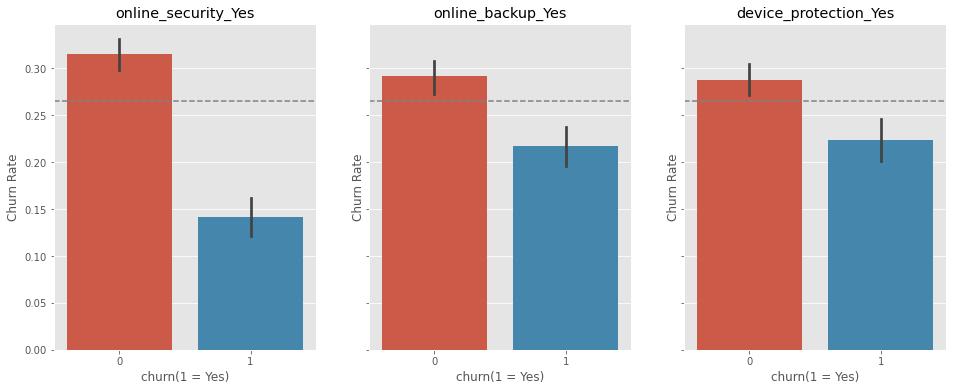

In [31]:
# Does having online secqurity fetures decrease churn 

features = ['online_security_Yes', 'online_backup_Yes', 'device_protection_Yes',]

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    plt.rc('font', size=10)
    sns.barplot(feature, 'churn', data=train, ax=ax[i])
    ax[i].set_xlabel('churn(1 = Yes)')
    ax[i].set_ylabel('Churn Rate')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Takeway
- people who use security features stay longer the people that don't
- Online security seems to increase more than anything else


## Hypothesis

$H_0$: Rate of churn is not dependent on client having online_sequrity_Yes.

$H_1$: Rate of churn is dependent on client having online_sequrity_Yes.

In [32]:
# Run a chi squared to compare proportions,
null_hypothesis = "Rate of churn is not dependent on client having online_sequrity_Yes."
alternative_hypothesis = "Rate of churn is dependent on client having online_sequrity_Yes."

observed = pd.crosstab(train.churn, train.online_security_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis:", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis: Rate of churn is not dependent on client having online_sequrity_Yes.
Sufficient evidence to move forward understanding that Rate of churn is dependent on client having online_sequrity_Yes.


In [33]:
print(f'chi2:{chi2}')
print(f'p= {p}')
print(f'degf= {degf}')
print(f'expected= {expected}')

chi2:123.29075841302787
p= 1.2044061823845062e-28
degf= 1
expected= [[2069.3009906  821.6990094]
 [ 748.6990094  297.3009906]]


In [34]:
observed

online_security_Yes,0,1
churn,,
0,1930,961
1,888,158


---------------

## 4. Do singles people stay longer? Does they way they relate to churn?

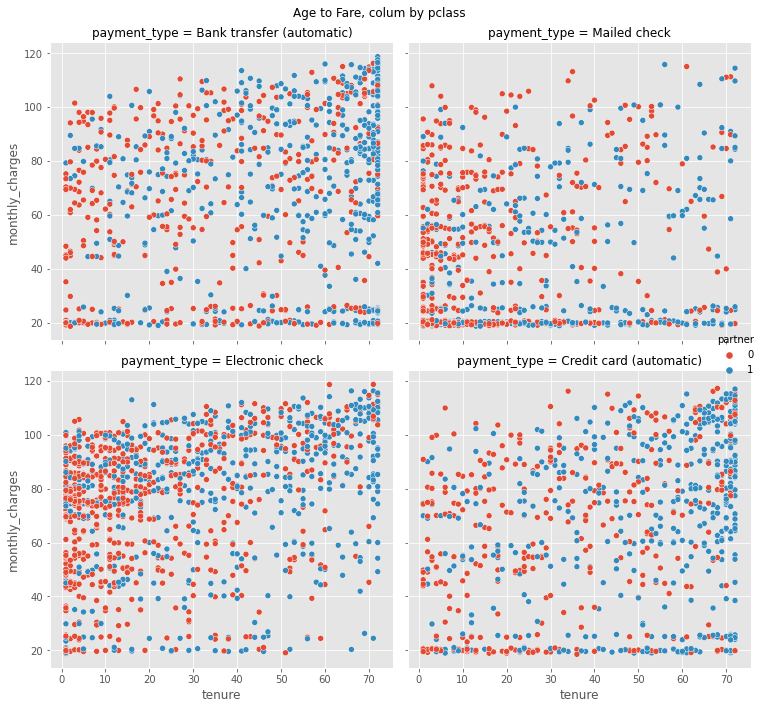

In [35]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x="tenure", y="monthly_charges",\
                  data=train, col="payment_type",\
                  col_wrap=2, hue="partner")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

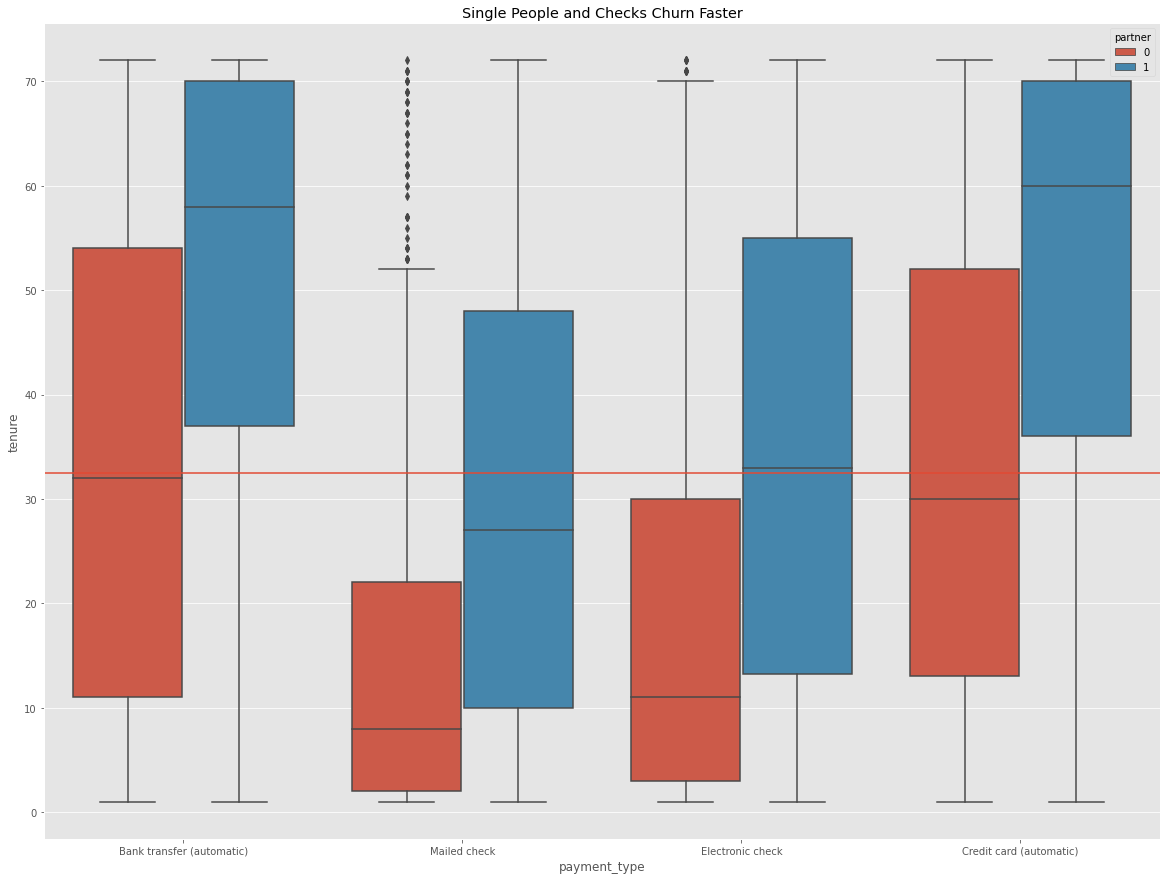

In [36]:
# Peple with parnters stay more than two times as ong as singles that use checks

plt.title("Single People and Checks Churn Faster")
sns.boxplot(x="payment_type", y="tenure", data=train, hue="partner",)
tenure_time_agerage = train.tenure.mean()
plt.axhline(tenure_time_agerage)
plt.show()


## Takeaway

- single pleople that use checks will no stay loinguer than year and a half. 
    - Try Incentivize customers to pay with bank transfer or credit card.

## Hypothesis

$H_0$: Tenure independent of bank transfer automatic payment

$H_1$: Tenure is independent of bank transfer automatic payment

----------------

# <center> Modeling <center>

In [37]:
train_validate, telco_test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.churn)

telco_train, telco_validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.churn)

print(telco_train.shape)
print(telco_validate.shape)
print(telco_test.shape)

(3937, 38)
(1688, 38)
(1407, 38)


### Base Line

In [38]:
baseline_accuracy = (train.churn == 0).mean()
print(f"Baseline Accuracy is: {round(baseline_accuracy, 3)*100}%")

Baseline Accuracy is: 73.4%


## Moedels used
Logistic_Regression DecisionTree RandomForest

In [39]:
modeling = df.columns.values.tolist()
modeling = train.drop(columns=['multiple_lines_No phone service'])
modeling

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,contract_type_one_year,contract_type_two_years,internet_service_type_fiber_optic,internet_service_type_None,payment_type_electronic_check,payment_type_Mailed check,no_internet
6096,3,3,3,0,1,0,70,1,No,No internet service,...,0,0,0,0,1,0,1,0,0,1
1603,2,1,1,0,1,1,15,1,No,No,...,1,0,1,0,0,0,0,0,1,0
5350,1,2,1,1,1,0,52,1,Yes,Yes,...,0,1,1,0,0,1,0,1,0,0
2068,1,1,1,0,0,0,39,0,No phone service,No,...,1,0,1,0,0,0,0,1,0,0
6366,2,3,2,0,1,0,32,1,No,No internet service,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,1,3,0,1,1,71,1,Yes,Yes,...,1,1,1,0,1,0,0,0,0,0
4200,3,2,1,1,1,0,16,1,No,No,...,0,0,0,0,0,1,0,0,0,0
3012,1,2,2,0,1,0,40,1,No,No,...,0,0,0,1,0,1,0,1,0,0
763,3,1,2,0,0,0,11,1,No,No,...,1,0,0,1,0,0,0,0,0,0


In [40]:
# Set features variable to onsed hilghlighted above 
features = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'is_female']
# features = features.remove('churn')
print(features)

['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges', 'is_female']


In [41]:
# Set X and Y
X_train = train[features]
X_validate = validate[features]
X_test = test[features]

y_train = train['churn']
y_validate = validate['churn']
y_test = test['churn']

# Set threshold = .05
threshold = threshold = .05

In [42]:
f' Base line sttimation of churn; {df.churn.mode()}'


' Base line sttimation of churn; 0    0\ndtype: int64'

In [43]:
evaluations = pd.DataFrame({"actual": y_validate})
evaluations["baseline"] = 0
matrix = pd.crosstab(evaluations.actual, evaluations.baseline)
matrix

baseline,0
actual,
0,1239
1,449


## Decision Tree

In [44]:
# Make the model
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

# Fit the model
clf = clf.fit(X_train, y_train)

# Train
y_pred = clf.predict(X_train)
train_accuracy = clf.score(X_train, y_train)

# Validate

y_pred = clf.predict(X_validate)
validate_accuracy = clf.score(X_validate, y_validate)


print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(clf.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


Accuracy of Decision Tree classifier on training set: 0.793
Accuracy of Decision Tree classifier on validate set: 0.780
Passes Treshold Allocation: True


In [45]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1150   89]
 [ 282  167]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1239
           1       0.65      0.37      0.47       449

    accuracy                           0.78      1688
   macro avg       0.73      0.65      0.67      1688
weighted avg       0.76      0.78      0.76      1688



------------


## K Neighbors

In [46]:
# Make the model
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

# Train
y_pred = knn.predict(X_train)
train_accuracy = knn.score(X_train, y_train)

# Validate
y_pred = knn.predict(X_validate)
validate_accuracy = knn.score(X_validate, y_validate)

print('Accuracy of K Neighbors classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K Neighbors classifier on validate set: {:.3f}'
      .format(knn.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")


Accuracy of K Neighbors classifier on training set: 0.81
Accuracy of K Neighbors classifier on validate set: 0.781
Passes Treshold Allocation: True


In [47]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1133  106]
 [ 263  186]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1239
           1       0.64      0.41      0.50       449

    accuracy                           0.78      1688
   macro avg       0.72      0.66      0.68      1688
weighted avg       0.77      0.78      0.76      1688



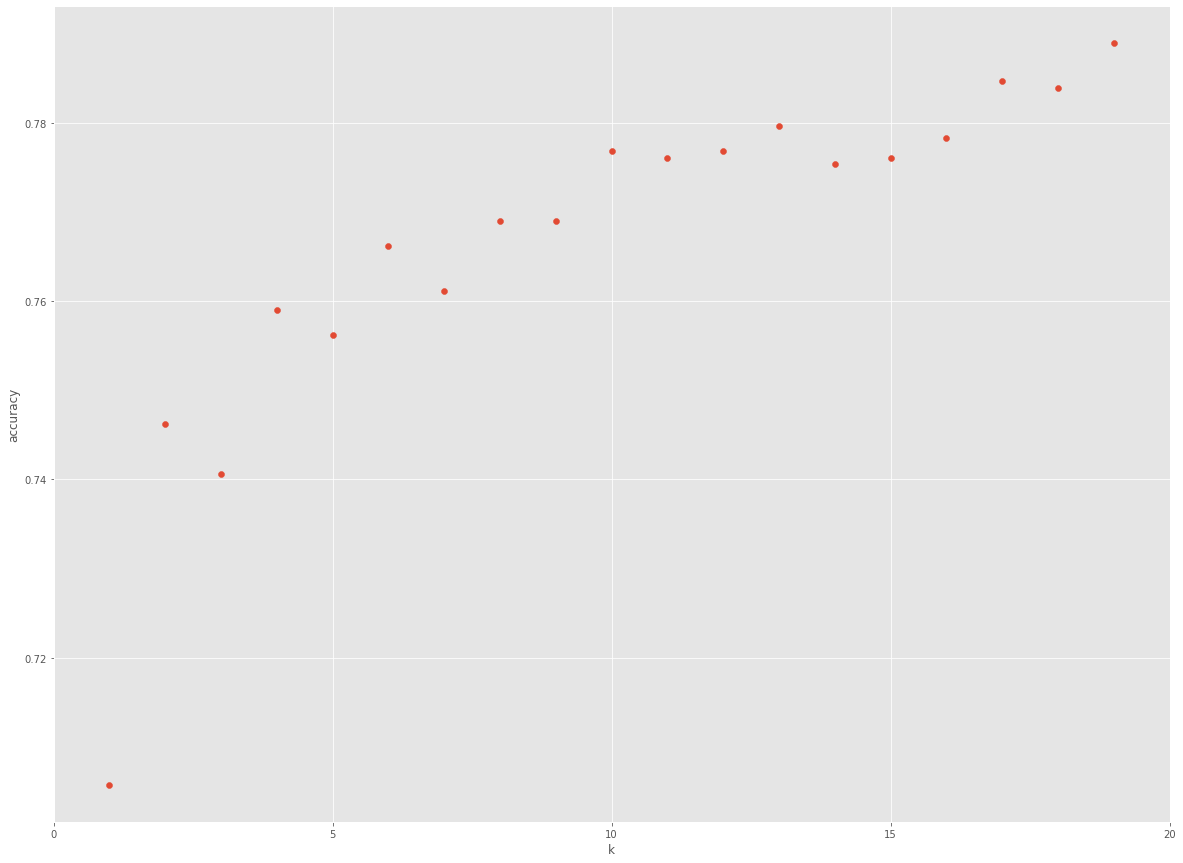

In [48]:
# visualize model
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

-------------------

## Logistic Regresion

In [52]:
# Make the model
logit = LogisticRegression(C=.15, random_state=123)

# Fit the Model
logit.fit(X_train, y_train)

# Train
y_pred = logit.predict(X_train)
train_accuracy = logit.score(X_train, y_train)

# Validate
y_pred = logit.predict(X_validate)
validate_accuracy = logit.score(X_validate, y_validate)

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
      .format(logit.score(X_validate, y_validate)))
print(f"Passes Treshold Allocation: {threshold > round(abs(train_accuracy-validate_accuracy), 3)}")

Accuracy of Logistic Regression classifier on training set: 0.79
Accuracy of Logistic Regression classifier on validate set: 0.792
Passes Treshold Allocation: True


In [53]:
print(confusion_matrix(y_validate, y_pred))
print(classification_report(y_validate, y_pred))

[[1099  140]
 [ 211  238]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1239
           1       0.63      0.53      0.58       449

    accuracy                           0.79      1688
   macro avg       0.73      0.71      0.72      1688
weighted avg       0.78      0.79      0.79      1688



In [54]:
proba_test = rf.predict_proba(X_test)
proba_df = pd.DataFrame(proba_test, columns=rf.classes_.tolist())
reset_test = test.reset_index()
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df = test_proba_df.rename(columns={0: 'not_churn', 1:'churn_yes'})
test_proba_df['predicted'] = np.where(test_proba_df.not_churn > test_proba_df.churn_yes, 'not_churn', 'churn')
csv_df = test_proba_df[['index', 'not_churn', 'churn_yes', 'predicted']]
csv_df.not_churn = csv_df.not_churn.round(2)
csv_df.churn_yes = csv_df.churn_yes.round(2)
csv_df.sample(5)

NameError: name 'rf' is not defined